**Stav Yosef**

**316298876**

**Colab:** [https://colab.research.google.com/drive/1P8sdtloY8qwDfaj6IQjDe9swB22bcHVj?usp=sharing](https://colab.research.google.com/drive/1P8sdtloY8qwDfaj6IQjDe9swB22bcHVj?usp=sharing)



---



# Question 1

## 1.a

$L = -\frac{1}{N}\sum_{i,j \in S}^{N}{\alpha_j\{y_{i,j}log[\sigma{(\mu + p_i + o_j + u^{T}_{i}v_{j})]} + (1 - y_{i,j})log[1 - \sigma{(\mu + p_i + o_j + u^{T}_{i}v_{j})]}\}}$ where $\sigma$ is the logistic function.

First, we need to simplify this equation.

We know that $\log{(\frac{a}{b})} = \log{(a)} - \log{(b)}$

$\sigma{(x)} = \frac{1}{1 + e^{-x}}$

$\log{(\sigma(x))} = \log{(\frac{1}{1 + e^{-x}})} = \log{(1)} - \log{(1+e^{-x})} = 0 -\log(1+e^{-x}) = -\log(1+e^{-x})$

$\log{(1 - \sigma{(x)})} = \log{(1 - \frac{1}{1 + e^{-x}})} = \log{(\frac{1+e^{-x} - 1}{1 + e^{-x}})} = \log{(\frac{e^{-x}}{1+e^{-x}})} = \log(e^{-x}) - \log{(1 + e^{-x})} = -x - \log{(1 + e^{-x})} = -(x + \log{(1 + e^{-x})})$

Let $x = \mu + p_i + o_j + u^{T}_{i}v_{j}$

$L = -\frac{1}{N}\sum_{i,j \in S}^{N}{\alpha_j\{y_{i,j}log[\sigma{(x)]} + (1 - y_{i,j})log[1 - \sigma{(x)]}\}}$

**Step 1** - substitute $\log{(\sigma{(x)})}$ and $\log{(1 - \sigma{(x)})}$

$L = -\frac{1}{N}\sum_{i,j \in S}^{N}{\alpha_j\{-y_{i,j}\log(1+e^{-x}) - (1 - y_{i,j})(x + \log{(1 + e^{-x})})\}}$

**Step 2** - extract the minus outside.

$L = \frac{1}{N}\sum_{i,j \in S}^{N}{\alpha_j\{y_{i,j}\log(1+e^{-x}) + (1 - y_{i,j})(x + \log{(1 + e^{-x})})\}}$

**Step 3** - open up parenthesis.

$L = \frac{1}{N}\sum_{i,j \in S}^{N}{\alpha_j\{y_{i,j}\log(1+e^{-x}) + x + \log{(1 + e^{-x})} -x\cdot{y_{i,j}} -y_{i,j}\log{(1 + e^{-x})}\}}$

$L = \sum_{i,j \in S}^{N}{\alpha_j\{x -x\cdot{y_{i,j}} + \log{(1 + e^{-x})}\}}$

$L = \frac{1}{N}\sum_{i,j \in S}^{N}{\alpha_{j}\cdot{x} -\alpha_{j}x\cdot{y_{i,j}} + \alpha_{j}\log{(1 + e^{-x})}}$



---



After we simplified our equation we can start to partial derivative each of the variables.

Mark $x = \mu + p_i + o_j + u^{T}_{i}v_{j}$

### Partial derivative with $\mu$



$\frac{\partial{L}}{\partial\mu} = 
\frac{\partial}{\partial\mu} \frac{1}{N}\sum_{i,j \in S}^{N}{\alpha_j\{x -x\cdot{y_{i,j}} + \log{(1 + e^{-x})}\}}$

$\frac{\partial{L}}{\partial\mu} =
\frac{1}{N}\sum_{i,j \in S}^{N}\frac{\partial}{\partial\mu}{\alpha_j\{x -x\cdot{y_{i,j}} + \log{(1 + e^{-x})}\}}$

$\frac{\partial{L}}{\partial\mu} =
\frac{1}{N}\sum_{i,j \in S}^{N}{\frac{\partial}{\partial\mu}\alpha_{j}x -\frac{\partial}{\partial\mu}\alpha_{j}x\cdot{y_{i,j}} + \frac{\partial}{\partial\mu}\alpha_{j}\log{(1 + e^{-x})}}$

$\frac{\partial}{\partial\mu} \cdot \alpha_{j}x = \frac{\partial}{\partial\mu} \alpha_{j} \cdot (\mu + p_i + o_j + u^{T}_{i}v_{j}) = \alpha_{j}$

$\frac{\partial}{\partial\mu}\alpha_{j}x\cdot{y_{i,j}} = \frac{\partial}{\partial\mu} \alpha_{j}\cdot{y_{i,j}} \cdot(\mu + p_i + o_j + u^{T}_{i}v_{j}) = \alpha_{j}{\cdot{y_{i,j}}}$

**Side note -** $\frac{\partial}{\partial{x}} \cdot \log_{e}{(f(x))} = \frac{f^{'}(x)}{f(x)} $

$\frac{\partial}{\partial\mu}\alpha_{j}\log{(1 + e^{-x})}
= \alpha_{j} \frac{\partial}{\partial\mu}\log{(1 + e^{-(\mu + p_i + o_j + u^{T}_{i}v_{j})})}
= - \frac{\alpha_{j} e^{-(\mu + p_i + o_j + u^{T}_{i}v_{j})}}{1 + e^{-(\mu + p_i + o_j + u^{T}_{i}v_{j})}} = - \frac{\alpha_{j} \cdot e^{-x}}{1 + e^{-x}}$

$\frac{\partial{L}}{\partial\mu} =
\frac{1}{N}\sum_{i,j \in S}^{N}{\alpha_{j} - \alpha_{j}{\cdot{y_{i,j}}} - \frac{\alpha_{j} \cdot e^{-x}}{1 + e^{-x}}}$

$\frac{\partial{L}}{\partial\mu} =
\frac{1}{N}\sum_{i,j \in S}^{N}{\alpha_{j}(1 - y_{i,j} - \frac{e^{-x}}{1 + e^{-x}})}$

**Update Rule:**

$\mu := \mu - \frac{\partial{L}}{\partial\mu}$

### Partial derivative with $p_{i}$



$\frac{\partial{L}}{\partial{p_{i}}} = 
\frac{\partial}{\partial{p_{i}}} \frac{1}{N}\sum_{i,j \in S}^{N}{\alpha_j\{x -x\cdot{y_{i,j}} + \log{(1 + e^{-x})}\}}$

$\frac{\partial{L}}{\partial{p_{i}}} =
\frac{1}{N}\sum_{i,j \in S}^{N}\frac{\partial}{\partial{p_{i}}}{\alpha_j\{x -x\cdot{y_{i,j}} + \log{(1 + e^{-x})}\}}$

$\frac{\partial{L}}{\partial{p_{i}}} =
\frac{1}{N}\sum_{i,j \in S}^{N}{\frac{\partial}{\partial{p_{i}}}\alpha_{j}x -\frac{\partial}{\partial{p_{i}}}\alpha_{j}x\cdot{y_{i,j}} + \frac{\partial}{\partial{p_{i}}}\alpha_{j}\log{(1 + e^{-x})}}$

$\frac{\partial}{\partial{p_{i}}} \cdot \alpha_{j}x = \frac{\partial}{\partial{p_{i}}} \alpha_{j} \cdot (\mu + p_i + o_j + u^{T}_{i}v_{j}) = \alpha_{j}$

$\frac{\partial}{\partial{p_{i}}}\alpha_{j}x\cdot{y_{i,j}} = \frac{\partial}{\partial{p_{i}}} \alpha_{j}\cdot{y_{i,j}} \cdot(\mu + p_i + o_j + u^{T}_{i}v_{j}) = \alpha_{j}{\cdot{y_{i,j}}}$

$\frac{\partial}{\partial{p_{i}}}\alpha_{j}\log{(1 + e^{-x})}
= \alpha_{j} \frac{\partial}{\partial{p_{i}}}\log{(1 + e^{-(\mu + p_i + o_j + u^{T}_{i}v_{j})})}
= - \frac{\alpha_{j} e^{-(\mu + p_i + o_j + u^{T}_{i}v_{j})}}{1 + e^{-(\mu + p_i + o_j + u^{T}_{i}v_{j})}} = - \frac{\alpha_{j} \cdot e^{-x}}{1 + e^{-x}}$

$\frac{\partial{L}}{\partial{p_{i}}} =
\frac{1}{N}\sum_{i,j \in S}^{N}{\alpha_{j} - \alpha_{j}{\cdot{y_{i,j}}} - \frac{\alpha_{j} \cdot e^{-x}}{1 + e^{-x}}}$

$\frac{\partial{L}}{\partial{p_{i}}} =
\frac{1}{N}\sum_{i,j \in S}^{N}{\alpha_{j}(1 - y_{i,j} - \frac{e^{-x}}{1 + e^{-x}})}$

**Update Rule:**

$p_{i} := p_{i} - \frac{\partial{L}}{\partial{p_{i}}}$

### Partial derivative with $o_{j}$



$\frac{\partial{L}}{\partial{o_{j}}} = 
\frac{\partial}{\partial{o_{j}}} \frac{1}{N}\sum_{i,j \in S}^{N}{\alpha_j\{x -x\cdot{y_{i,j}} + \log{(1 + e^{-x})}\}}$

$\frac{\partial{L}}{\partial{o_{j}}} =
\frac{1}{N}\sum_{i,j \in S}^{N}\frac{\partial}{\partial{o_{j}}}{\alpha_j\{x -x\cdot{y_{i,j}} + \log{(1 + e^{-x})}\}}$

$\frac{\partial{L}}{\partial{o_{j}}} =
\frac{1}{N}\sum_{i,j \in S}^{N}{\frac{\partial}{\partial\mu}\alpha_{j}x -\frac{\partial}{\partial{o_{j}}}\alpha_{j}x\cdot{y_{i,j}} + \frac{\partial}{\partial{o_{j}}}\alpha_{j}\log{(1 + e^{-x})}}$

$\frac{\partial}{\partial{o_{j}}} \cdot \alpha_{j}x = \frac{\partial}{\partial{o_{j}}} \alpha_{j} \cdot (\mu + p_i + o_j + u^{T}_{i}v_{j}) = \alpha_{j}$

$\frac{\partial}{\partial{o_{j}}}\alpha_{j}x\cdot{y_{i,j}} = \frac{\partial}{\partial{o_{j}}} \alpha_{j}\cdot{y_{i,j}} \cdot(\mu + p_i + o_j + u^{T}_{i}v_{j}) = \alpha_{j}{\cdot{y_{i,j}}}$

$\frac{\partial}{\partial{o_{j}}}\alpha_{j}\log{(1 + e^{-x})}
= \alpha_{j} \frac{\partial}{\partial{o_{j}}}\log{(1 + e^{-(\mu + p_i + o_j + u^{T}_{i}v_{j})})}
= - \frac{\alpha_{j} e^{-(\mu + p_i + o_j + u^{T}_{i}v_{j})}}{1 + e^{-(\mu + p_i + o_j + u^{T}_{i}v_{j})}} = - \frac{\alpha_{j} \cdot e^{-x}}{1 + e^{-x}}$

$\frac{\partial{L}}{\partial{o_{j}}} =
\frac{1}{N}\sum_{i,j \in S}^{N}{\alpha_{j} - \alpha_{j}{\cdot{y_{i,j}}} - \frac{\alpha_{j} \cdot e^{-x}}{1 + e^{-x}}}$

$\frac{\partial{L}}{\partial{o_{j}}} =
\frac{1}{N}\sum_{i,j \in S}^{N}{\alpha_{j}(1 - y_{i,j} - \frac{e^{-x}}{1 + e^{-x}})}$

**Update Rule:**

$o_{j} := o_{j} - \frac{\partial{L}}{\partial{o_{j}}}$

### Partial derivative with $u_{i}$



$\frac{\partial{L}}{\partial{u_{i}}} = 
\frac{\partial}{\partial{u_{i}}} \frac{1}{N}\sum_{i,j \in S}^{N}{\alpha_j\{x -x\cdot{y_{i,j}} + \log{(1 + e^{-x})}\}}$

$\frac{\partial{L}}{\partial{u_{i}}} =
\frac{1}{N}\sum_{i,j \in S}^{N}\frac{\partial}{\partial{u_{i}}}{\alpha_j\{x -x\cdot{y_{i,j}} + \log{(1 + e^{-x})}\}}$

$\frac{\partial{L}}{\partial{u_{i}}} =
\frac{1}{N}\sum_{i,j \in S}^{N}{\frac{\partial}{\partial{u_{i}}}\alpha_{j}x -\frac{\partial}{\partial{u_{i}}}\alpha_{j}x\cdot{y_{i,j}} + \frac{\partial}{\partial{u_{i}}}\alpha_{j}\log{(1 + e^{-x})}}$

$\frac{\partial}{\partial{u_{i}}} \cdot \alpha_{j}x = \frac{\partial}{\partial{u_{i}}} \alpha_{j} \cdot (\mu + p_i + o_j + u^{T}_{i}v_{j}) = \alpha_{j}v_{j}$

$\frac{\partial}{\partial{u_{i}}}\alpha_{j}x\cdot{y_{i,j}} = \frac{\partial}{\partial{u_{i}}} \alpha_{j}\cdot{y_{i,j}} \cdot(\mu + p_i + o_j + u^{T}_{i}v_{j}) = \alpha_{j}\cdot{y_{i,j}}\cdot{v_{j}}$

$\frac{\partial}{\partial{u_{i}}}\alpha_{j}\log{(1 + e^{-x})}
= \alpha_{j} \frac{\partial}{\partial{u_{i}}}\log{(1 + e^{-(\mu + p_i + o_j + u^{T}_{i}v_{j})})}
= - \frac{\alpha_{j}\cdot{v_{j}}\cdot e^{-(\mu + p_i + o_j + u^{T}_{i}v_{j})}}{1 + e^{-(\mu + p_i + o_j + u^{T}_{i}v_{j})}} = - \frac{\alpha_{j}\cdot{v_{j}} \cdot e^{-x}}{1 + e^{-x}}$

$\frac{\partial{L}}{\partial{u_{i}}} =
\frac{1}{N}\sum_{i,j \in S}^{N}{\alpha_{j}\cdot{v_{j}} - \alpha_{j}\cdot{y_{i,j}}\cdot{v_{j}} - \frac{\alpha_{j}\cdot{v_{j}} \cdot e^{-x}}{1 + e^{-x}}}$

$\frac{\partial{L}}{\partial{u_{i}}} =
\frac{1}{N}\sum_{i,j \in S}^{N}{(\alpha_{j}\cdot{v_{j}})(1 - y_{i,j} - \frac{e^{-x}}{1 + e^{-x}})}$

**Update Rule:**

$u_{i} := u_{i} - \frac{\partial{L}}{\partial{u_{i}}}$

### Partial derivative with $v_{j}$



$\frac{\partial{L}}{\partial{v_{j}}} = 
\frac{\partial}{\partial{v_{j}}} \frac{1}{N}\sum_{i,j \in S}^{N}{\alpha_j\{x -x\cdot{y_{i,j}} + \log{(1 + e^{-x})}\}}$

$\frac{\partial{L}}{\partial{v_{j}}} =
\frac{1}{N}\sum_{i,j \in S}^{N}\frac{\partial}{\partial{v_{j}}}{\alpha_j\{x -x\cdot{y_{i,j}} + \log{(1 + e^{-x})}\}}$

$\frac{\partial{L}}{\partial{v_{j}}} =
\frac{1}{N}\sum_{i,j \in S}^{N}{\frac{\partial}{\partial{v_{j}}}\alpha_{j}x -\frac{\partial}{\partial{v_{j}}}\alpha_{j}x\cdot{y_{i,j}} + \frac{\partial}{\partial{v_{j}}}\alpha_{j}\log{(1 + e^{-x})}}$

$\frac{\partial}{\partial{v_{j}}} \cdot \alpha_{j}x = \frac{\partial}{\partial{v_{j}}} \alpha_{j} \cdot (\mu + p_i + o_j + u^{T}_{i}v_{j}) = \alpha_{j}u_{i}$

$\frac{\partial}{\partial{v_{j}}}\alpha_{j}x\cdot{y_{i,j}} = \frac{\partial}{\partial{v_{j}}} \alpha_{j}\cdot{y_{i,j}} \cdot(\mu + p_i + o_j + u^{T}_{i}v_{j}) = \alpha_{j}\cdot{y_{i,j}}\cdot{u_{i}}$

$\frac{\partial}{\partial{v_{j}}}\alpha_{j}\log{(1 + e^{-x})}
= \alpha_{j} \frac{\partial}{\partial{v_{j}}}\log{(1 + e^{-(\mu + p_i + o_j + u^{T}_{i}v_{j})})}
= - \frac{\alpha_{j}\cdot{u_{i}}\cdot e^{-(\mu + p_i + o_j + u^{T}_{i}v_{j})}}{1 + e^{-(\mu + p_i + o_j + u^{T}_{i}v_{j})}} = - \frac{\alpha_{j}\cdot{u_{i}} \cdot e^{-x}}{1 + e^{-x}}$

$\frac{\partial{L}}{\partial{v_{j}}} =
\frac{1}{N}\sum_{i,j \in S}^{N}{\alpha_{j}\cdot{u_{i}} - \alpha_{j}\cdot{y_{i,j}}\cdot{u_{i}} - \frac{\alpha_{j}\cdot{u_{i}} \cdot e^{-x}}{1 + e^{-x}}}$

$\frac{\partial{L}}{\partial{v_{j}}} =
\frac{1}{N}\sum_{i,j \in S}^{N}{(\alpha_{j}\cdot{u_{i}})(1 - y_{i,j} - \frac{e^{-x}}{1 + e^{-x}})}$

**Update Rule:**

$v_{j} := v_{j} - \frac{\partial{L}}{\partial{v_{j}}}$

## 1.b

The answer for this question is in question 2.d :)

# Question 2

## Setup

In [ ]:
import numpy as np
import scipy
import scipy.sparse as sp

In [ ]:
from tensorflow import keras
import keras

In [ ]:
from time import time
import math
import os
from os.path import join as os_join
import heapq  # for retrieval topK
import multiprocessing
from typing import List

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Dataset Handling

In [ ]:
class Dataset(object):

    def __init__(self, _path: str, dataset_name: str):
        self.train_matrix = self.load_rating_file_as_matrix(os_join(_path, f'{dataset_name}.train.rating'))
        self.test_ratings = self.load_rating_file_as_list(os_join(_path, f'{dataset_name}.test.rating'))
        self.test_negatives = self.load_negative_file(os_join(_path, f'{dataset_name}.test.negative'))

        assert len(self.test_ratings) == len(self.test_negatives)

        self.num_users, self.num_items = self.train_matrix.shape

    def load_rating_file_as_list(self, filename: str) -> list:
        rating = []

        with open(filename, "r") as f:
            line = f.readline()
            while line is not None and not "".__eq__(line):
                arr = line.split("\t")
                user, item = int(arr[0]), int(arr[1])

                rating.append([user, item])

                line = f.readline()

        return rating

    def load_negative_file(self, filename: str) -> list:
        negative = []

        with open(filename, "r") as f:
            line = f.readline()
            while line is not None and not "".__eq__(line):
                arr = line.split("\t")

                negative.append([int(_) for _ in arr[1:]])

                line = f.readline()

        return negative

    def load_rating_file_as_matrix(self, filename: str) -> sp.dok_matrix:
        """
        Read .rating file and Return dok matrix.
        The first line of .rating file is: num_users\t num_items
        """

        if os.path.exists(f'{filename}.npz'):
            return scipy.sparse.load_npz(f'{filename}.npz').todok()

        # Get number of users and items
        num_users, num_items = 0, 0
        print(filename)
        with open(filename, "r") as f:
            line = f.readline()
            while line is not None and not "".__eq__(line):
                arr = line.split("\t")
                u, i = int(arr[0]), int(arr[1])
                num_users = max(num_users, u)
                num_items = max(num_items, i)
                line = f.readline()
        # Construct matrix

        mat = sp.dok_matrix((num_users + 1, num_items + 1), dtype=np.float32)

        counter = 0
        with open(filename, "r") as f:
            line = f.readline()
            while line is not None and not "".__eq__(line):
                arr = line.split("\t")
                user, item, rating = int(arr[0]), int(arr[1]), float(arr[2])
                if rating > 0:
                    mat[user, item] = 1.0
                line = f.readline()

        scipy.sparse.save_npz(f'{filename}.npz', mat.tocoo())

        return mat

## Evaluation

In [ ]:
def make_predictions(model:keras.models.Model, test_ratings: list, test_negatives: list) -> (List[np.ndarray], np.ndarray):
    test_ratings_np = np.array(test_ratings)
    test_negatives_np = np.array(test_negatives)

    test_ratings_np_users = test_ratings_np[:, 0]
    test_ratings_np_items = test_ratings_np[:, 1].reshape(test_ratings_np.shape[0], 1)

    test_matrix = np.hstack((test_negatives_np, test_ratings_np_items))
    test_matrix = test_matrix.reshape(test_matrix.size)

    users = np.arange(num_users)
    users = np.repeat(users, 100)
    users = users.reshape(users.size)

    predictions = model.predict([users, test_matrix], batch_size=batch_size, verbose=0)
    predictions = predictions.reshape(predictions.size)
    split_predictions = np.split(predictions, np.arange(100, predictions.size, 100))

    return split_predictions, test_matrix.reshape(num_users, 100)

In [ ]:
def get_ranklist(split_predictions: List[np.ndarray], test_matrix_2D: np.ndarray, user: int, cut_off: int) -> List[int]:
    indices = np.flip(np.argsort(split_predictions[user].flatten()))[:cut_off]
    return test_matrix_2D[user, indices].tolist()

In [ ]:
def evaluate_model(test_ratings: np.ndarray, split_predictions: List[np.ndarray], test_matrix_2D: np.ndarray,
                      cut_off: int) -> (float, float, float, np.ndarray, float, np.ndarray):
    def get_mrr(ranklist: list, item_target: int) -> float:
        for i in range(0, len(ranklist)):
            if ranklist[i] == item_target:
                return 1 / (i + 1)
        return 0

    def get_ndcg(ranklist: list, item_target: int) -> float:
        for i in range(len(ranklist)):
            if ranklist[i] == item_target:
                return math.log(2) / math.log(i + 2)
        return 0

    num_users = test_matrix_2D.shape[0]

    df_items_price = pd.read_csv('item_priceold2csv.csv', sep=',')

    mrrs, ndcgs, items_price, items_price_ranking = [], [], [], []
    for u in range(num_users):
        indices = np.flip(np.argsort(split_predictions[u].flatten()))[:cut_off]
        ranklist = get_ranklist(split_predictions=split_predictions, test_matrix_2D=test_matrix_2D, user=u,
                                cut_off=cut_off)

        target_item = test_ratings[u][1]
        mrrs.append(get_mrr(ranklist, target_item))
        ndcgs.append(get_ndcg(ranklist, target_item))

        if target_item in ranklist:
            item_price = df_items_price.iloc[target_item][1]

            items_price.append(item_price)

            idx_in_list = cut_off - np.where(np.array(ranklist) == target_item)[0][0]
            items_price_ranking.append(item_price * (idx_in_list / cut_off))

    return np.array(mrrs).mean(), \
           np.array(ndcgs).mean(), \
           (np.sum(np.array(items_price)) / num_users), \
           np.array(items_price), \
           (np.sum(np.array(items_price_ranking)) / num_users), \
           np.array(items_price_ranking)

## Get Model - GMF

In [ ]:
def get_GMF_model(num_users: int, num_items: int, latent_dim: int, regs=None):
    # Generalized Matrix Factorization

    # Input variables
    if regs is None:
        regs = [[0, 0]]

    user_input = keras.layers.Input(shape=(1,), dtype='int32', name='user_input')
    item_input = keras.layers.Input(shape=(1,), dtype='int32', name='item_input')

    MF_Embedding_User = keras.layers.Embedding(
        input_dim=num_users, output_dim=latent_dim, name='user_embedding',
        embeddings_regularizer=keras.regularizers.l2(regs[0][0]), input_length=1,
        embeddings_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.01))  # init = init_normal,

    MF_Embedding_Item = keras.layers.Embedding(
        input_dim=num_items, output_dim=latent_dim, name='item_embedding',
        embeddings_regularizer=keras.regularizers.l2(regs[0][1]), input_length=1,
        embeddings_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.01))  # init = init_normal,

    # Crucial to flatten an embedding vector!
    user_latent = keras.layers.Flatten()(MF_Embedding_User(user_input))
    item_latent = keras.layers.Flatten()(MF_Embedding_Item(item_input))

    # Element-wise product of user and item embeddings
    predict_vector = keras.layers.Multiply()(
        [user_latent, item_latent])  # merge([user_latent, item_latent], mode = 'mul')

    # Final prediction layer
    prediction = keras.layers.Dense(1, activation='sigmoid', kernel_initializer='lecun_uniform', name='prediction')(
        predict_vector)

    return keras.models.Model(inputs=[user_input, item_input], outputs=prediction)

## Train Instances Function

In [ ]:
def get_train_instances(train_dok: sp.dok_matrix, num_negatives: int):
    t1 = time()

    num_users = train_dok.shape[0]

    train_np = train_dok.todense()
    user_ratings_counter = np.sum(train_np, axis=1)

    _ = num_negatives + 1
    users_input = np.concatenate([np.full(int(user_ratings_counter[u] * _), u, dtype='int32')
                                  for u in range(num_users)])

    total_ones = np.sum(train_np)

    my_labels = np.concatenate([np.ones(int(total_ones), dtype='int32'),
                                np.zeros(int(total_ones * num_negatives))])

    xor_matrix = np.logical_xor(train_np, np.ones(train_np.shape))

    train_xor_ones = np.argsort(xor_matrix, axis=1)

    tmp_list = []
    for u in range(train_xor_ones.shape[0]):
        u_r_c = int(user_ratings_counter[u])
        arr = train_xor_ones[u, u_r_c:]

        size = int(num_negatives * u_r_c)
        tmp_list.append(arr[0, np.random.choice(arr.size, size)])

    negatives_np = np.concatenate(tmp_list, axis=1)

    items_input = np.argwhere(train_np == 1)[:, 1]
    items_input = items_input.reshape(1, items_input.size)
    items_input = np.concatenate([items_input, negatives_np], axis=1)

    return users_input.tolist(), items_input.tolist()[0], my_labels.tolist()

## Unzip Data & Models

In [ ]:
import shutil
shutil.unpack_archive('ml-1m.zip', 'ml-1m')

In [ ]:
shutil.unpack_archive('models.zip', '')

## Main

In [ ]:
def create_dir(_path: str):
    if not os.path.exists(_path):
        os.mkdir(_path)

In [ ]:
create_dir(_path='models/')
create_dir(_path='models/without_weights/')
create_dir(_path='models/with_weights/')
create_dir(_path='models/with_weights/normal')
create_dir(_path='models/with_weights/square')
create_dir(_path='models/with_weights/sqrt')

In [ ]:
path = 'ml-1m'
dataset = 'ml-1m'
num_factors = 8
num_negatives = 4 
learning_rate = 0.001
batch_size = 2048

dataset = Dataset(_path=path, dataset_name=dataset)
train_matrix, test_ratings, test_negatives = dataset.train_matrix, dataset.test_ratings, dataset.test_negatives
num_users, num_items = train_matrix.shape
print("Users:", num_users)
print("Items:", num_items)

Users: 6040
Items: 3706


In [ ]:
model = get_GMF_model(num_users, num_items, num_factors, regs = [[0,0]])
model.compile(optimizer=keras.optimizers.Adam(lr=learning_rate), loss='binary_crossentropy')

print("GMF")
print(model.summary())

GMF
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
item_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 8)         48320       user_input[0][0]                 
__________________________________________________________________________________________________
item_embedding (Embedding)      (None, 1, 8)         29648       item_input[0][0]                 
________________________________________________________________________________________

In [ ]:
# Train model without weights

for epoch in range(30):
    _path_model = f'models/without_weights/model_after_epoch_{epoch + 1}'
    if os.path.exists(_path_model):
        model = keras.models.load_model(_path_model)
        continue

    start_time = time()

    user_input, item_input, labels = get_train_instances(train_matrix, num_negatives)
    hist = model.fit([np.array(user_input), np.array(item_input)],
                    np.array(labels),
                    batch_size=batch_size,
                    epochs=1,
                    verbose=0,
                    shuffle=True)
    
    model.save(f'models/without_weights/model_after_epoch_{epoch + 1}')

    print(f'Iteration {epoch + 1} done in {time() - start_time} seconds!')

print("Done!")

Done!


In [ ]:
model_weights = get_GMF_model(num_users, num_items, num_factors, regs = [[0,0]])
model_weights.compile(optimizer=keras.optimizers.Adam(lr=learning_rate), loss='binary_crossentropy')

print("GMF with Price Weights")
print(model.summary())

GMF with Price Weights
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
item_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 8)         48320       user_input[0][0]                 
__________________________________________________________________________________________________
item_embedding (Embedding)      (None, 1, 8)         29648       item_input[0][0]                 
_______________________________________________________________________

In [ ]:
# Train model with weights

df = pd.read_csv('item_priceold2csv.csv', sep=',')

path_models = 'with_weights'
weights = 'normal' # normal/square/sqrt

for epoch in range(30):
    _path_model = f'models/with_weights/{weights}/model_after_epoch_{epoch + 1}'
    if os.path.exists(_path_model):
        model_weights = keras.models.load_model(_path_model)
        continue

    start_time = time()

    user_input, item_input, labels = get_train_instances(train_matrix, num_negatives)

    weights_np = df['price'].to_numpy()

    if weights == 'normal':
        weights_np = weights_np[item_input]
    elif weights == 'square':
        weights_np = np.square(weights_np[item_input])
    elif weights == 'sqrt':
        weights_np = np.sqrt(weights_np[item_input])

    hist = model_weights.fit([np.array(user_input), np.array(item_input)],
                             np.array(labels),
                             batch_size=batch_size,
                             sample_weight=weights_np,
                             epochs=1,
                             verbose=0,
                             shuffle=True)
    
    model_weights.save(_path_model)

    print(f'Iteration {epoch + 1} done in {time() - start_time} seconds!')

In [ ]:
# shutil.make_archive('save_models', 'zip', 'models')

'/content/save_models.zip'

In [ ]:
def plot_pie(prices_counter: list, prices_distribution: np.ndarray, title: str = None):
    colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orchid'][:len(prices_counter)]
    explode = (0.1, 0, 0, 0, 0)[:len(prices_counter)]

    plt.pie(prices_counter, explode=explode, labels=prices_distribution, colors=colors, autopct='%1.2f%%', shadow=True, startangle=205, textprops={'fontsize': 16})

    if title is not None:
        plt.suptitle(title, fontsize=24, fontweight='bold', color='salmon')
    plt.axis('equal')
    plt.show()

In [ ]:
def create_pie_plot(items_price, title: str = None):
    prices_distribution = np.unique(np.array(items_price))

    prices_counter = []
    for p in prices_distribution:
        prices_counter.append(len(np.where(items_price == p)[0]))

    plot_pie(prices_counter=prices_counter, prices_distribution=prices_distribution, title=title)

## 2.a

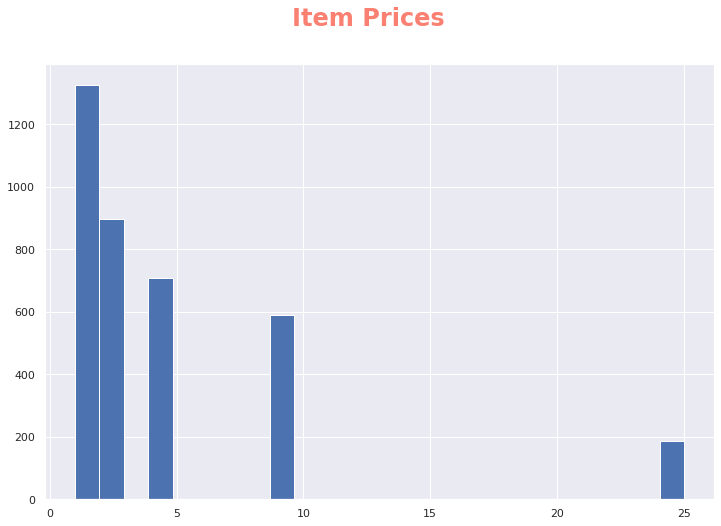

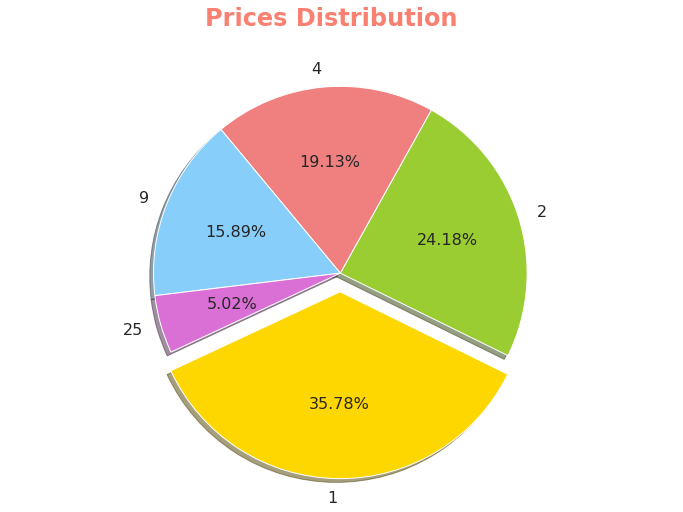

In [ ]:
plt.rcParams["figure.figsize"] = (12, 8)

df = pd.read_csv('item_priceold2csv.csv')

items_price = df['price'].to_numpy()

max_price = np.max(items_price)

plt.suptitle('Item Prices', fontsize=24, fontweight='bold', color='salmon')
plt.hist(df['price'], max_price)
plt.show()

create_pie_plot(items_price=items_price, title="Prices Distribution")

As we can see in the plots above price distribution is 1, 2, 4, 9, and 25.

The most common price is **1** and the least is **25**, **35.78%**, and **5.02%** respectively.

To increase the revenue, we'll need to **recommend more** on the items with a price of 25 and less on items with a price of 1. (In total there are 3706 items)


## 2.b + 2.c

Take a look at the function "evaluate_model" in Evaluation section.

First of all, with a lot of effort, I succeeded to make everything almost vectorized, include the predictions for the users all at once, ( = saving 6039 times calls of model.predict).

Hence, the code runs fast (takes a couple of seconds to do all the predictions & evaluations instead of 10 minutes approximately with explicit loops).

For question 2.c I chose to check what place the positive instance is in the rank list.

For example, let the rank list be $[10, 65, 23, 74, 9]$ and our positive instance is $65$ so, the weight of the revenue is $\frac{5_{cut off = 5} - 1}{cut off = 5} \cdot 65_{price} = 0.8 \cdot 65_{price}$

The metric is suitable for this kind of task because it takes into consideration both item's price and its rank in the rank list without additional "noise". 

## 2.d

In [ ]:
weights = 'normal'

user_input, item_input, labels = get_train_instances(train_matrix, num_negatives)

weights_np = df['price'].to_numpy()

if weights == 'normal':
    weights_np = weights_np[item_input]
elif weights == 'square':
    weights_np = np.square(weights_np[item_input])
elif weights == 'sqrt':
    weights_np = np.sqrt(weights_np[item_input])

hist = model_weights.fit([np.array(user_input), np.array(item_input)],
                         np.array(labels),
                         batch_size=batch_size,
                         sample_weight=weights_np,
                         epochs=1,
                         verbose=0,
                         shuffle=True)

As we can see above (The full code is in the section "Main")

I trained 3 differents models with differents sample weights, One model using sample weights as the item's price (respectively to item_input variable), the second model square those prices & the third model is taking a root out of the prices.

When we square the prices the disparity is getting much **bigger** ($1^2 = 1$ and $25^2 = 625$) therefore, the items with the price 25 are more likely to be predicted and the items with the price 1 are less likely to be predicted.

And in the third model, the effect of the prices (as model 2, square prices) is exactly the opposite ($\sqrt{1} = 1$ and $\sqrt{25} = 5$) still, items with the price 25 are more likely to be predicted than items with the price 1 but they getting fewer weights than model 1 & model 2.

**Note -** 1 & 25 were just examples, the same effect exists with every pair of prices.


## 2.e

In [ ]:
#Evaluation of the models

def evaluation_of_models(path_models: str, weights: str):
    mrrs_5, mrrs_10 = [], []
    ndcgs_5, ndcgs_10 = [], []
    revenues_5, revenues_10 = [], []
    revenues_5_ranking, revenues_10_ranking = [], []
    prices_distribution_5, prices_distribution_10 = [], []
    prices_distribution_5_ranking, prices_distribution_10_ranking = [], []

    for i in range(30):
        if path_models == 'with_weights':
            model_path = f'models/{path_models}/{weights}/model_after_epoch_{i + 1}'
        else:
            model_path = f'models/{path_models}/model_after_epoch_{i + 1}'

        if not os.path.exists(model_path):
            continue

        model = keras.models.load_model(model_path)

        print(f'Model{i + 1} ({path_models}) is loaded and ready to be evaluated')

        split_predictions, test_matrix_2D = make_predictions(model=model, test_ratings=test_ratings, test_negatives=test_negatives)

        results  = evaluate_model(test_ratings=test_ratings, split_predictions=split_predictions, test_matrix_2D=test_matrix_2D, cut_off=5)

        mrrs_5.append(results[0])
        ndcgs_5.append(results[1])
        revenues_5.append(results[2])
        prices_distribution_5.append(results[3])
        revenues_5_ranking.append(results[4])
        prices_distribution_5_ranking.append(results[5])

        results  = evaluate_model(test_ratings=test_ratings, split_predictions=split_predictions, test_matrix_2D=test_matrix_2D, cut_off=10)

        mrrs_10.append(results[0])
        ndcgs_10.append(results[1])
        revenues_10.append(results[2])
        prices_distribution_10.append(results[3])
        revenues_10_ranking.append(results[4])
        prices_distribution_10_ranking.append(results[5])

    return mrrs_5, mrrs_10, ndcgs_5, ndcgs_10, revenues_5, revenues_10, prices_distribution_5, prices_distribution_10, revenues_5_ranking, revenues_10_ranking, prices_distribution_5_ranking, prices_distribution_10_ranking

In [ ]:
path_models = 'without_weights'
weights = 'normal' # normal/square/sqrt

mrrs_5, mrrs_10, ndcgs_5, ndcgs_10, revenues_5, revenues_10, prices_distribution_5, prices_distribution_10, revenues_5_ranking, revenues_10_ranking, prices_distribution_5_ranking, prices_distribution_10_ranking = evaluation_of_models(path_models=path_models, weights=weights)

Model1 (without_weights) is loaded and ready to be evaluated
Model2 (without_weights) is loaded and ready to be evaluated
Model3 (without_weights) is loaded and ready to be evaluated
Model4 (without_weights) is loaded and ready to be evaluated
Model5 (without_weights) is loaded and ready to be evaluated
Model6 (without_weights) is loaded and ready to be evaluated
Model7 (without_weights) is loaded and ready to be evaluated
Model8 (without_weights) is loaded and ready to be evaluated
Model9 (without_weights) is loaded and ready to be evaluated
Model10 (without_weights) is loaded and ready to be evaluated
Model11 (without_weights) is loaded and ready to be evaluated
Model12 (without_weights) is loaded and ready to be evaluated
Model13 (without_weights) is loaded and ready to be evaluated
Model14 (without_weights) is loaded and ready to be evaluated
Model15 (without_weights) is loaded and ready to be evaluated
Model16 (without_weights) is loaded and ready to be evaluated
Model17 (without_

In [ ]:
path_models = 'with_weights'
weights = 'sqrt' # normal/square/sqrt

mrrs_5_sqrt, mrrs_10_sqrt, ndcgs_5_sqrt, ndcgs_10_sqrt, revenues_5_sqrt, revenues_10_sqrt, prices_distribution_5_sqrt, prices_distribution_10_sqrt, revenues_5_ranking_sqrt, revenues_10_ranking_sqrt, prices_distribution_5_ranking_sqrt, prices_distribution_10_ranking = evaluation_of_models(path_models=path_models, weights=weights)

Model1 (with_weights) is loaded and ready to be evaluated
Model2 (with_weights) is loaded and ready to be evaluated
Model3 (with_weights) is loaded and ready to be evaluated
Model4 (with_weights) is loaded and ready to be evaluated
Model5 (with_weights) is loaded and ready to be evaluated
Model6 (with_weights) is loaded and ready to be evaluated
Model7 (with_weights) is loaded and ready to be evaluated
Model8 (with_weights) is loaded and ready to be evaluated
Model9 (with_weights) is loaded and ready to be evaluated
Model10 (with_weights) is loaded and ready to be evaluated
Model11 (with_weights) is loaded and ready to be evaluated
Model12 (with_weights) is loaded and ready to be evaluated
Model13 (with_weights) is loaded and ready to be evaluated
Model14 (with_weights) is loaded and ready to be evaluated
Model15 (with_weights) is loaded and ready to be evaluated
Model16 (with_weights) is loaded and ready to be evaluated
Model17 (with_weights) is loaded and ready to be evaluated
Model1

In [ ]:
path_models = 'with_weights'
weights = 'normal' # normal/square/sqrt

mrrs_5_normal, mrrs_10_normal, ndcgs_5_normal, ndcgs_10_normal, revenues_5_normal, revenues_10_normal, prices_distribution_5_normal, prices_distribution_10_normal, revenues_5_ranking_normal, revenues_10_ranking_normal, prices_distribution_5_ranking_normal, prices_distribution_10_ranking = evaluation_of_models(path_models=path_models, weights=weights)

Model1 (with_weights) is loaded and ready to be evaluated
Model2 (with_weights) is loaded and ready to be evaluated
Model3 (with_weights) is loaded and ready to be evaluated
Model4 (with_weights) is loaded and ready to be evaluated
Model5 (with_weights) is loaded and ready to be evaluated
Model6 (with_weights) is loaded and ready to be evaluated
Model7 (with_weights) is loaded and ready to be evaluated
Model8 (with_weights) is loaded and ready to be evaluated
Model9 (with_weights) is loaded and ready to be evaluated
Model10 (with_weights) is loaded and ready to be evaluated
Model11 (with_weights) is loaded and ready to be evaluated
Model12 (with_weights) is loaded and ready to be evaluated
Model13 (with_weights) is loaded and ready to be evaluated
Model14 (with_weights) is loaded and ready to be evaluated
Model15 (with_weights) is loaded and ready to be evaluated
Model16 (with_weights) is loaded and ready to be evaluated
Model17 (with_weights) is loaded and ready to be evaluated
Model1

In [ ]:
path_models = 'with_weights'
weights = 'square' # normal/square/sqrt

mrrs_5_square, mrrs_10_square, ndcgs_5_square, ndcgs_10_square, revenues_5_square, revenues_10_square, prices_distribution_5_square, prices_distribution_10_square, revenues_5_ranking_square, revenues_10_ranking_square, prices_distribution_5_ranking_square, prices_distribution_10_ranking = evaluation_of_models(path_models=path_models, weights=weights)

Model1 (with_weights) is loaded and ready to be evaluated
Model2 (with_weights) is loaded and ready to be evaluated
Model3 (with_weights) is loaded and ready to be evaluated
Model4 (with_weights) is loaded and ready to be evaluated
Model5 (with_weights) is loaded and ready to be evaluated
Model6 (with_weights) is loaded and ready to be evaluated
Model7 (with_weights) is loaded and ready to be evaluated
Model8 (with_weights) is loaded and ready to be evaluated
Model9 (with_weights) is loaded and ready to be evaluated
Model10 (with_weights) is loaded and ready to be evaluated
Model11 (with_weights) is loaded and ready to be evaluated
Model12 (with_weights) is loaded and ready to be evaluated
Model13 (with_weights) is loaded and ready to be evaluated
Model14 (with_weights) is loaded and ready to be evaluated
Model15 (with_weights) is loaded and ready to be evaluated
Model16 (with_weights) is loaded and ready to be evaluated
Model17 (with_weights) is loaded and ready to be evaluated
Model1

In [ ]:
def plot_results(data: list, labels:list, title: str, loc:str = 'upper right'):
    plt.rcParams["figure.figsize"] = (20, 10)

    plt.suptitle(title, fontsize=24, fontweight='bold', color='salmon')

    plt.plot(data[0], color='lightgreen', label=labels[0])
    plt.plot(data[1], color='orchid', label=labels[1])
    plt.plot(data[2], color='skyblue', label=labels[2])
    plt.plot(data[3], color='lightcoral', label=labels[3])

    plt.legend(loc='upper right', fontsize=16)

    plt.xlabel("Epochs", fontsize=20)
    plt.ylabel(title, fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.show()

In [ ]:
def plot_prices_distribution_results(data: list, labels:list, title: str, loc:str = 'upper right'):
    plt.rcParams["figure.figsize"] = (20, 10)

    plt.suptitle(title, fontsize=24, fontweight='bold', color='salmon')

    plt.plot(data[0], color='lightgreen', label=labels[0])
    plt.plot(data[1], color='orchid', label=labels[1])
    plt.plot(data[2], color='skyblue', label=labels[2])
    plt.plot(data[3], color='lightcoral', label=labels[3])
    plt.plot(data[4], color='gold', label=labels[4])

    plt.legend(loc='upper right', fontsize=16)

    plt.xlabel("Epochs", fontsize=20)
    plt.ylabel('Price Counter', fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.show()

In [ ]:
def display_prices_distribution(distri: list, title: str):
    prices = ['1', '2', '4', '9', '25']

    arr = np.zeros((1 , 5))

    for dist in distri:
        coutners = []
        for p in prices:
            coutners.append(len(np.where(dist == int(p))[0]))

        arr = np.vstack((arr, coutners))

    data = [arr[1:, i] for i in range(len(prices))]
    labels = [f'Price Tag - {prices[i]}' for i in range(len(prices))]

    plot_prices_distribution_results(data=data, labels=labels, title=title)

### MRR 5

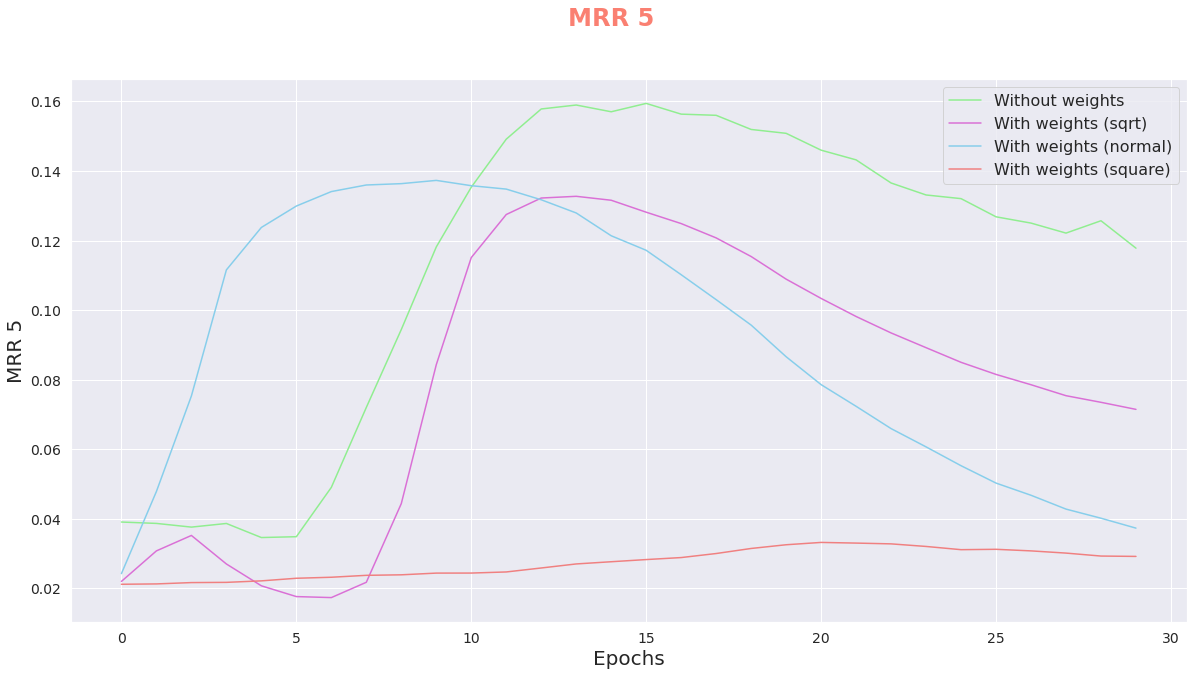

In [ ]:
data = [mrrs_5, mrrs_5_sqrt, mrrs_5_normal, mrrs_5_square]
labels = ['Without weights', 'With weights (sqrt)', 'With weights (normal)', 'With weights (square)']

plot_results(data=data, labels=labels, title="MRR 5")

### NDCG 5

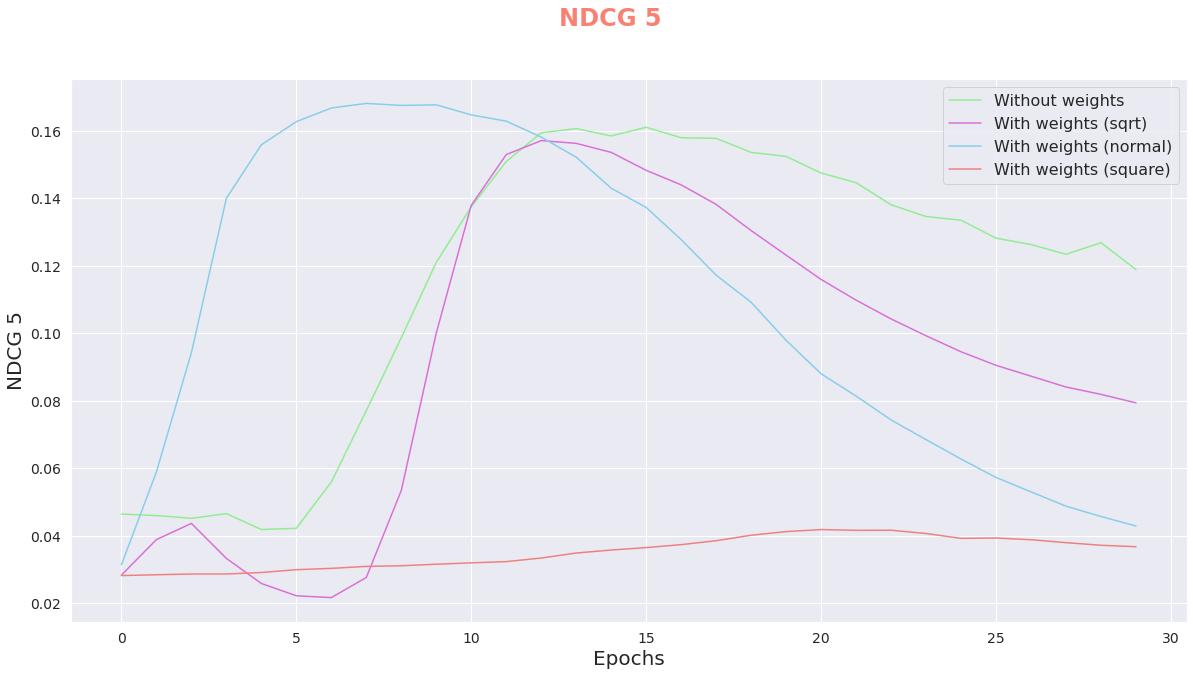

In [ ]:
data = [ndcgs_5, ndcgs_5_sqrt, ndcgs_5_normal, ndcgs_5_square]
labels = ['Without weights', 'With weights (sqrt)', 'With weights (normal)', 'With weights (square)']

plot_results(data=data, labels=labels, title="NDCG 5")

### Revenue 5

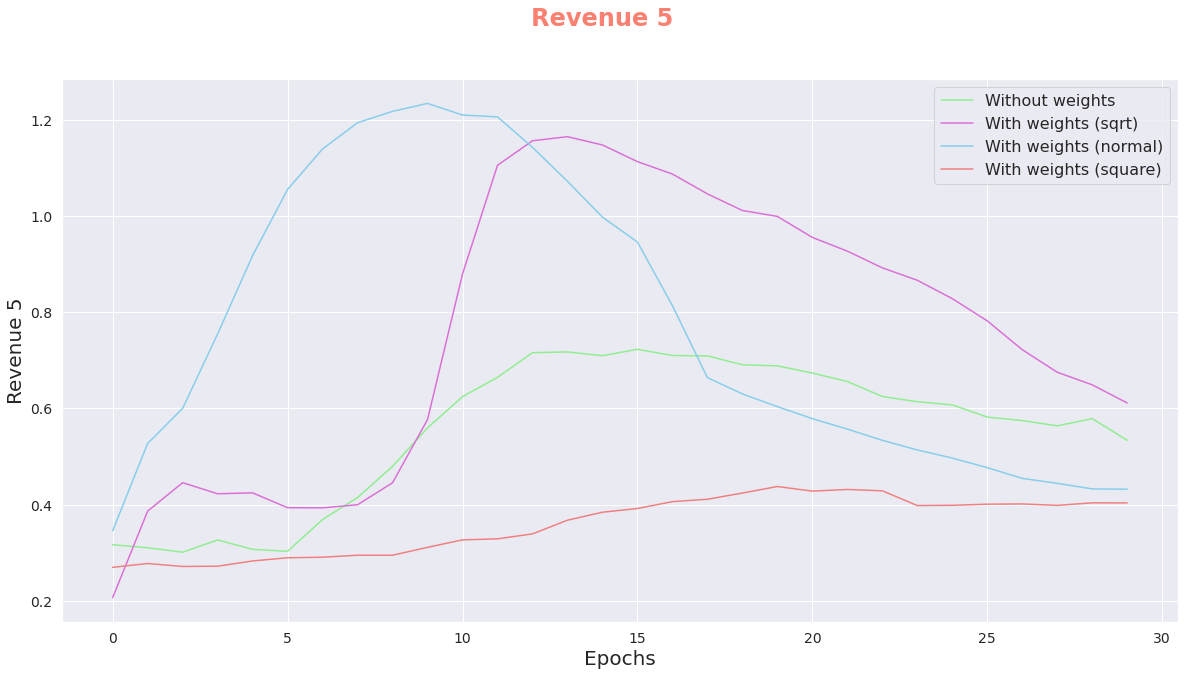

In [ ]:
data = [revenues_5, revenues_5_sqrt, revenues_5_normal, revenues_5_square]
labels = ['Without weights', 'With weights (sqrt)', 'With weights (normal)', 'With weights (square)']

plot_results(data=data, labels=labels, title="Revenue 5")

#### Items Distrubution

##### Without weights

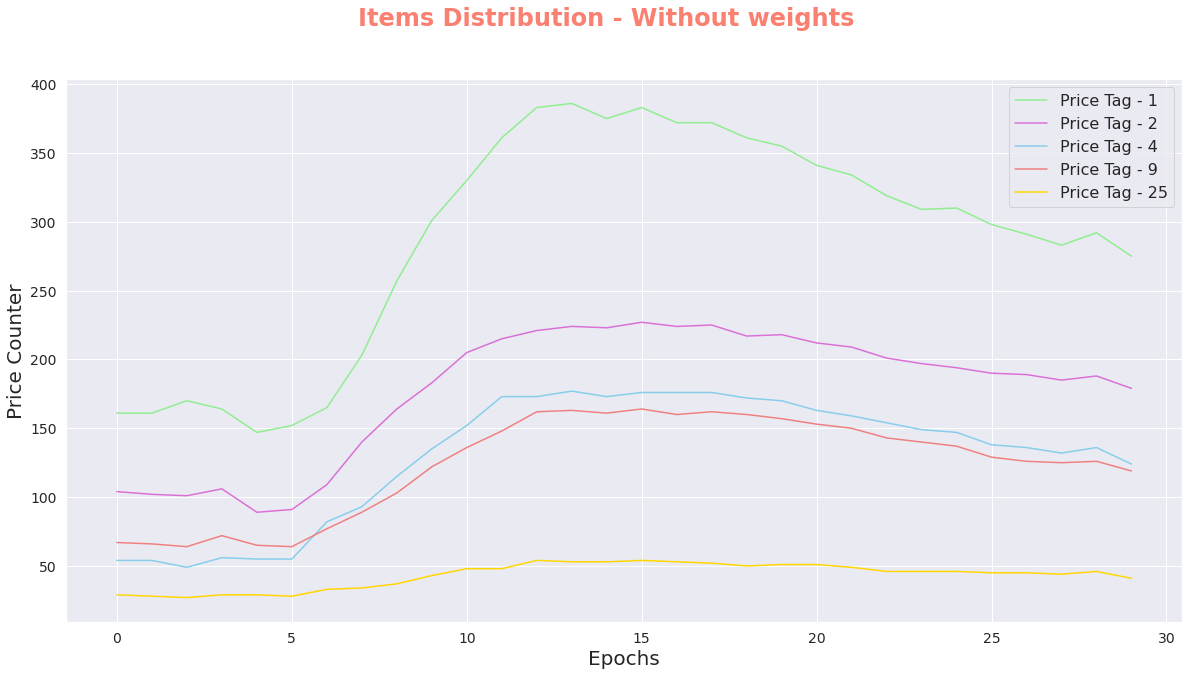

In [ ]:
display_prices_distribution(distri=prices_distribution_5, title="Items Distribution - Without weights")

##### With weights (normal)

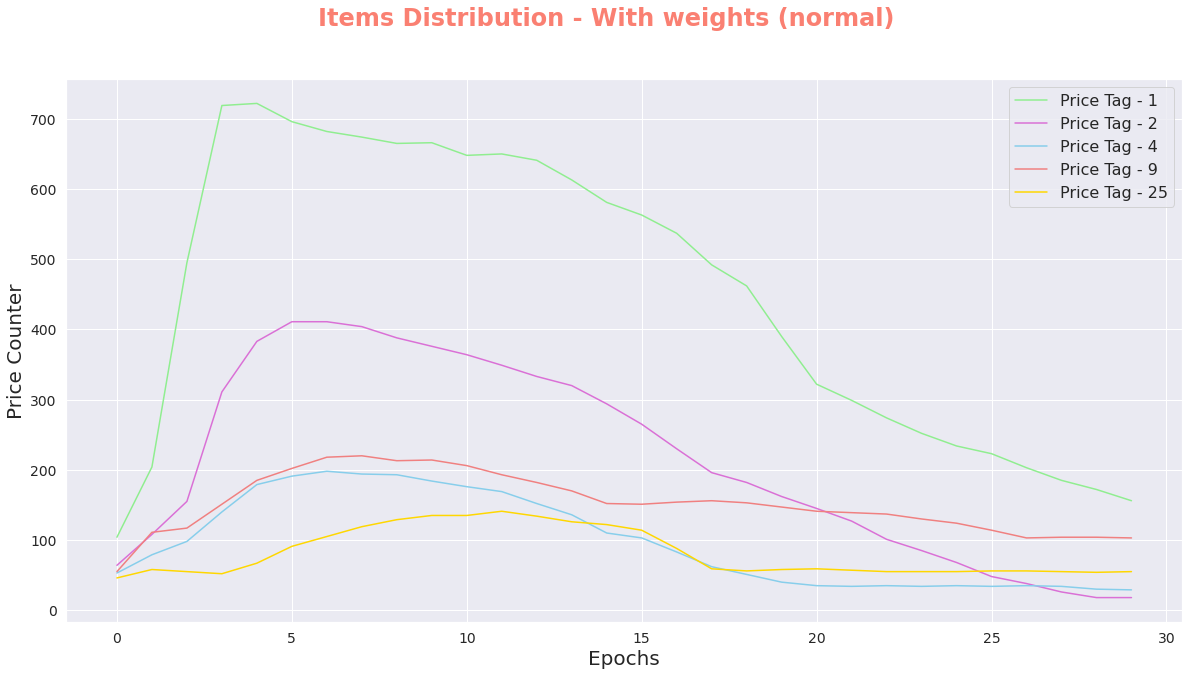

In [ ]:
display_prices_distribution(distri=prices_distribution_5_normal, title="Items Distribution - With weights (normal)")

##### With weights (sqrt)

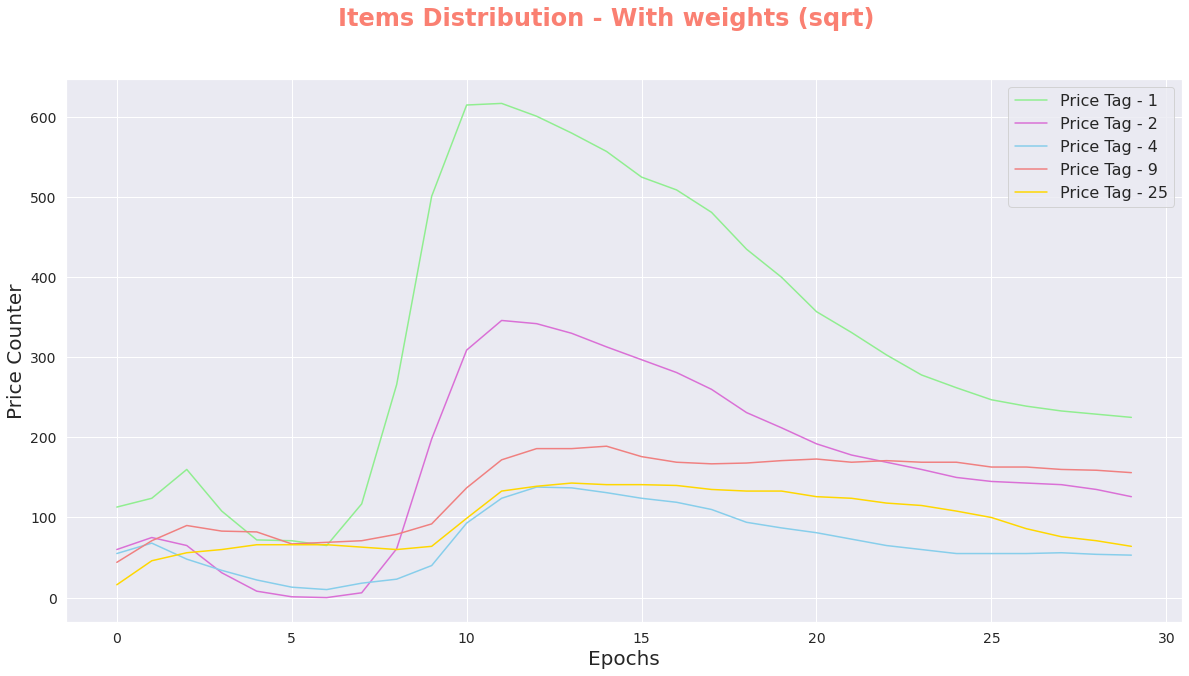

In [ ]:
display_prices_distribution(distri=prices_distribution_5_sqrt, title="Items Distribution - With weights (sqrt)")

##### With weights (square)

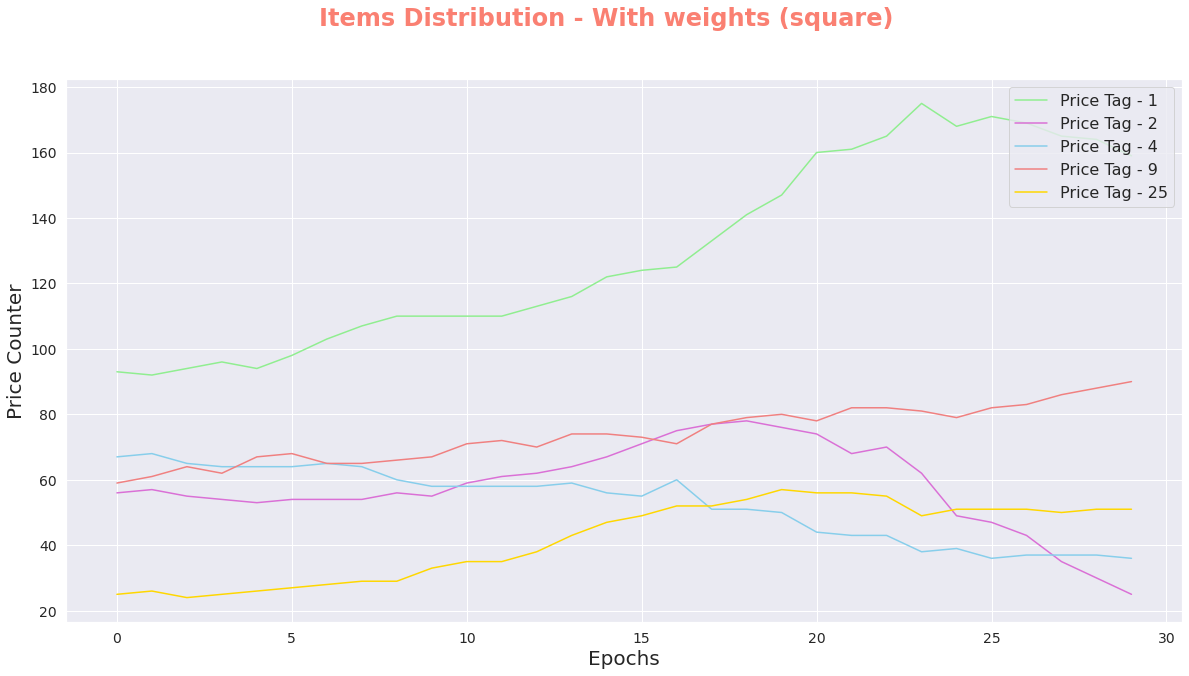

In [ ]:
display_prices_distribution(distri=prices_distribution_5_square, title="Items Distribution - With weights (square)")

### Revenue 5 with Ranking

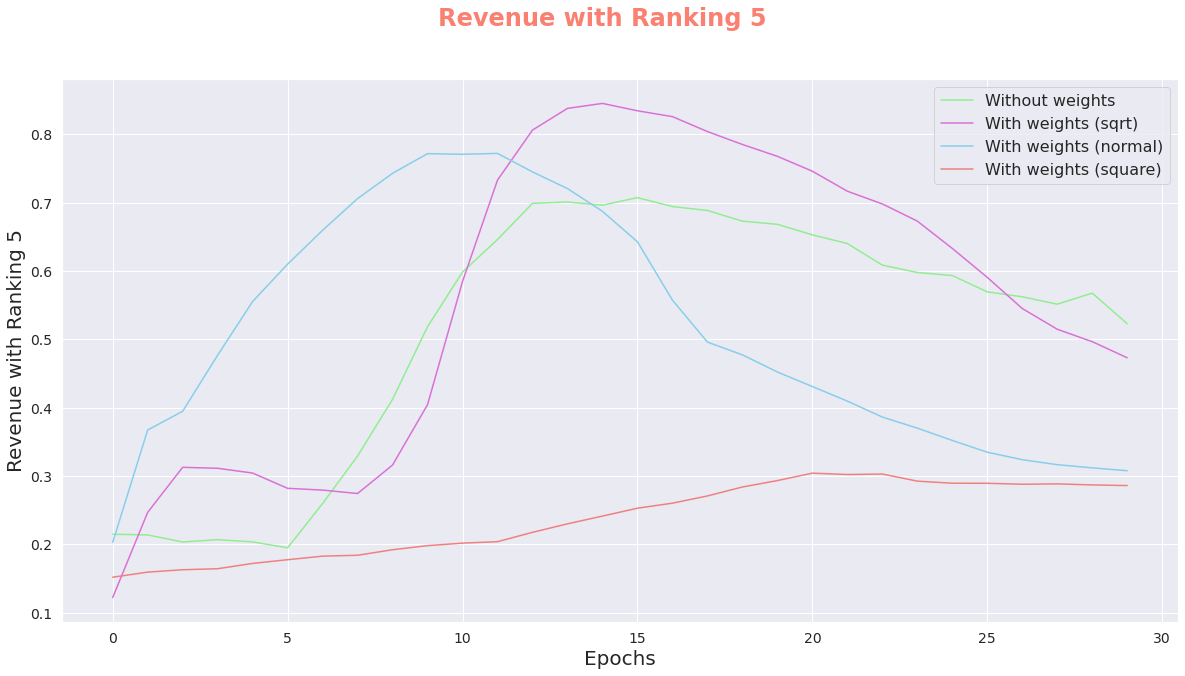

In [ ]:
data = [revenues_5_ranking, revenues_5_ranking_sqrt, revenues_5_ranking_normal, revenues_5_ranking_square]
labels = ['Without weights', 'With weights (sqrt)', 'With weights (normal)', 'With weights (square)']

plot_results(data=data, labels=labels, title="Revenue with Ranking 5")

#### Items Distrubution

**Prices distribution is the same as without ranking.**

### Discussion

Let's start with the revenue, as we can see all models have healthy learning till **epoch 10~15**. We can see weighted models winning against the model without weights. The most profitable model is the model with normal weights.
All the models have great progress through the 15 epochs.

The best way to see changes is through revenue distribution.
Let's compare the model without weights with the model with the normal weights.

Price 1 -	370~ vs **650~**

Price 2 -	225~ vs **375~**

Price 4 -	175~ vs **180~**

Price 9 -	160~ vs **200~**

Price 25 - 50~ vs **125~**

We can see the model with the normal weights is winning in every aspect, especially in price tag 25, **over 100% growth!**

In the models with the weights, we can see clearly that items with a price of 1 & 2 are getting "crashed" with the times they occurred.

Another interesting factor we can see is the metric revenue with ranking where the model with sqrt weights is taking the first place from the model with the normal weights.

For me, I was surprised that the model with square weights is pretty much the worse against all 3 other models in every aspect (revenue & item distribution). 

All 4 models have their advantages and disadvantages, the model without weights is fitting x30 times faster than the models with the weights.
the number of negative instances per positive instance is taking a crucial part if we will use only 1 the models will be trained much faster but the results we are achieving are not so good and if we take too many negative instances it's can train the model in the wrong way (as I experienced).
Batch size & learning rate have their part also, too big a batch size can take over all the RAM.

In conclusion, there are many factors we need to take into account and, every parameter we choose has its advantages and disadvantages which leads to a trade-off between the time of training to the accuracy of the model and much more aspects.


# Question 3

## 3.a

After I looked at the original MovieLens 1M dataset, all possible features of a user are:

- Gender, 2 unique values
- Zip Code
- Age, 7 unique values
- Occupation, 20 unique values

And for Item are:
- Title
- Genres, 18 unique values


To solve this problem creatively, we can be preprocessing the similarity between the movies (cosine similarity can be applied here), and for movies that won't pass a threshold (like 1000 ratings), we will take the most similar movie that does pass the threshold and give the unrated movie his average score as a weight to the GMF model, the way we should set the weights is changing and need to be tested but we will have indicator how much item that is unrated should weight.

In this solution, we can approach any problem that we have "extra" content and check similarities between items based on content only.

For convenience reasons, I used in the example above with movie term only but we can apply it to users also


## 3.b

## 3.b + 3.c

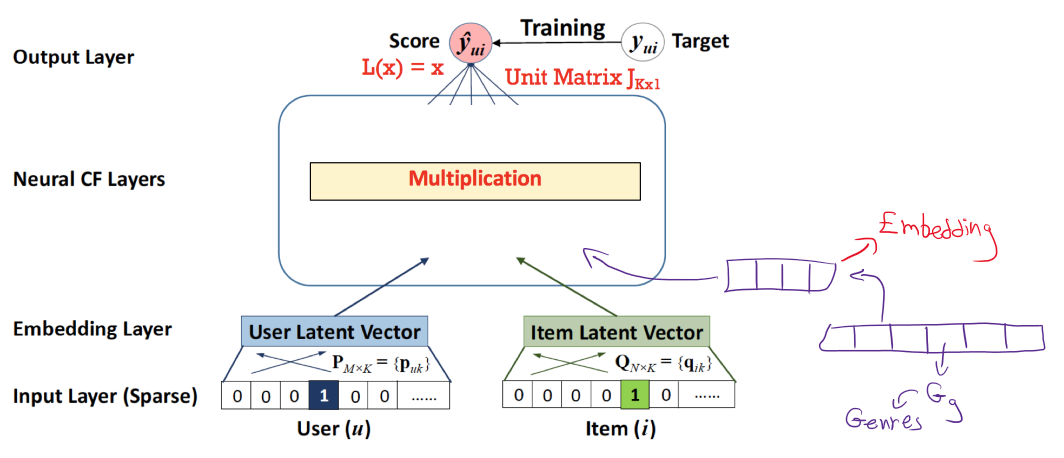

Instead of having only user (u) & item (i), we will add genres as the third input. Before connecting the genres to the multiplication layer first, we need to connect it to the embedding layer to achieve the genre latent vector. After we connecting the genre vector the multiplication layer is the same GMF.

It's important to note that we can expand this example to every feature we have, in the end, we can have 7 embedding layers (user id, movie id, zip code, age, and so on...)
We will obtain from each embedding layer a latent vector and then multiply them all together
The final layer will use a sigmoid  activation layer to produce a result (prediction)